In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imd_sentences =[]
imd_labels=[]

Importer le dataset IMDB Dataset

In [3]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split='train'))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9O6AE5/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9O6AE5/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9O6AE5/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train_data

In [5]:
for item in train_data:
  print(item)
  break

{'label': 0, 'text': b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."}


In [6]:
imdb_sentences =[]
imdb_labels=[]
for item in train_data:
  imdb_sentences.append(str(item['text']))
  imdb_labels.append(item['label'])

In [7]:
len(imdb_sentences)

25000

In [8]:
training_sentences = imdb_sentences[:20000]
test_sentences = imdb_sentences[20000:]

training_labels = imdb_labels[:20000]
test_labels = imdb_labels[20000:]

In [9]:
len(test_labels)

5000

#Tokenisation (Phrases --> Liste de mots)

In [10]:
phrase = "Je suis en train de travailler"

In [11]:
phrase.split(" ")

['Je', 'suis', 'en', 'train', 'de', 'travailler']

In [12]:
phrases = ["je suis en train de travailler sur tenserflow","j'ai beaucoup appris aujourd'hui"]

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer = Tokenizer()

In [15]:
#on lui fait apprendre les differents
tokenizer.fit_on_texts(phrases)

In [16]:
#quels sont les mots que tu as appris
tokenizer.word_index

{'je': 1,
 'suis': 2,
 'en': 3,
 'train': 4,
 'de': 5,
 'travailler': 6,
 'sur': 7,
 'tenserflow': 8,
 "j'ai": 9,
 'beaucoup': 10,
 'appris': 11,
 "aujourd'hui": 12}

In [17]:
#on va passer à la numerisation du texte
tokenizer.texts_to_sequences(phrases)

[[1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12]]

In [18]:
test =["qui suis je moi ?"]

In [19]:
tokenizer.texts_to_sequences(test)

[[2, 1]]

In [20]:
#on precise le nbre de mot qu'on veut dans le vocabulaire,on peut le reduire pour prendre les mots les plus pertinants
#oov: out of vocabulary(un token speciale qui n'est pas dans notre vocabilaire)
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(test)

In [21]:
tokenizer.word_index

{'<OOV>': 1, 'qui': 2, 'suis': 3, 'je': 4, 'moi': 5}

#Paddind et Truncating

In [22]:
#les phrases ont des tailles differentes
#generalemet tous les exemples ou models ont la maille taille
#pour y remedier on utilise le padding
phrases = ["Je suis au marché",
           "Je travaille au marché",
           "es-tu rentré du marché?",
           "Je nettoie le marché tous les jours avant de commencer à vendre le matin"]


tokenizer = Tokenizer(num_words = 100, oov_token="")
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [23]:
sequences

[[3, 6, 4, 2],
 [3, 7, 4, 2],
 [8, 9, 10, 11, 2],
 [3, 12, 5, 2, 13, 14, 15, 16, 17, 18, 19, 20, 5, 21]]

In [24]:
#pour faire le padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [25]:
#le pré padding , il met les 0 avant
pad_sequences(sequences)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  6,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  7,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  9, 10, 11,  2],
       [ 3, 12,  5,  2, 13, 14, 15, 16, 17, 18, 19, 20,  5, 21]],
      dtype=int32)

In [26]:
#le pré padding , il met les 0 apres
pad_sequences(sequences, padding="post")

array([[ 3,  6,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 12,  5,  2, 13, 14, 15, 16, 17, 18, 19, 20,  5, 21]],
      dtype=int32)

In [27]:
#faire du truncating (couper la phrase)
pad_sequences(sequences, padding="post",maxlen=7)

array([[ 3,  6,  4,  2,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0],
       [16, 17, 18, 19, 20,  5, 21]], dtype=int32)

In [28]:
#faire du truncating (couper la phrase)
pad_sequences(sequences, padding="post",maxlen=7, truncating="post")

array([[ 3,  6,  4,  2,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0],
       [ 3, 12,  5,  2, 13, 14, 15]], dtype=int32)

#Stop words
Le terme stop word ou mot vide désigne tous les mots n'ayant pas de réelle signification. On dit aussi qu'ils ne sont pas porteurs de sens. En effet, ils sont si courants et reviennent de façon tellement régulière qu’ils ne permettent pas de caractériser, au sens lexical, un texte par rapport à un autre texte

In [29]:
phrase = "Je vais au marché le Jeudi"

In [30]:
stopwords = ['au', "le"]

In [31]:
#on fait une sorte de tokenisation
#
words = phrase.split(' ')
phrase_nettoyee = []

for word in words:
  if word not in stopwords:
    phrase_nettoyee.append(word)

In [32]:
phrase_nettoyee

['Je', 'vais', 'marché', 'Jeudi']

In [33]:
" ".join(phrase_nettoyee)

'Je vais marché Jeudi'

#Embending
Avoir un vecteur qui represente un mot donnee. On aura un vecteur qui represente un mot donee

In [34]:
training_labels[42]

0

In [35]:
tokenizer = Tokenizer(num_words=20000, oov_token="")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

In [36]:
training_padded[11]


array([   1,   20,   45,  291, 4665, 2404,   38, 8753,  415,  113,  624,
         45,    9, 8754, 5330], dtype=int32)

In [38]:
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [39]:
test_labels[2]

1

In [40]:
#dans la couche  embending, on a 20000 mots et chaque mot à 20nbre qu'ils caracterisent.
#Cette couche à des weight (ces 20000 * 20 sont des W qu'il faudra apprendre.)
#on va commencer par des W aleatoire, puis on fait la moyenne et on lui donne a une couche de reseau de neurone
#En s'entrainant, il va s'ameliorer
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(20000, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [41]:
#on a 40000 Par = 20000*20
#dense = 20*8 + 8(ce sont les biais) = 168

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (  (None, 20)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400177 (1.53 MB)
Trainable params: 400177 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
#classification binaire
#on compile le model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [43]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)

In [44]:
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 6ms/step - loss: 0.6535 - accuracy: 0.6245 - val_loss: 0.6011 - val_accuracy: 0.6868
Epoch 2/50
 21/625 [>.............................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7723

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 4s 6ms/step - loss: 0.5165 - accuracy: 0.7534 - val_loss: 0.5751 - val_accuracy: 0.7002
Epoch 3/50
625/625 [==============================] - 5s 7ms/step - loss: 0.4309 - accuracy: 0.8073 - val_loss: 0.6040 - val_accuracy: 0.6964
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3787 - accuracy: 0.8363 - val_loss: 0.6421 - val_accuracy: 0.6892
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3401 - accuracy: 0.8559 - val_loss: 0.6810 - val_accuracy: 0.6930
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3122 - accuracy: 0.8704 - val_loss: 0.7307 - val_accuracy: 0.6860
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2908 - accuracy: 0.8803 - val_loss: 0.7726 - val_accuracy: 0.6852
Epoch 8/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2728 - accuracy: 0.8872 - val_loss: 0.8228 - val_accuracy: 0.6760
Epoch 9/50
625/62

In [45]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

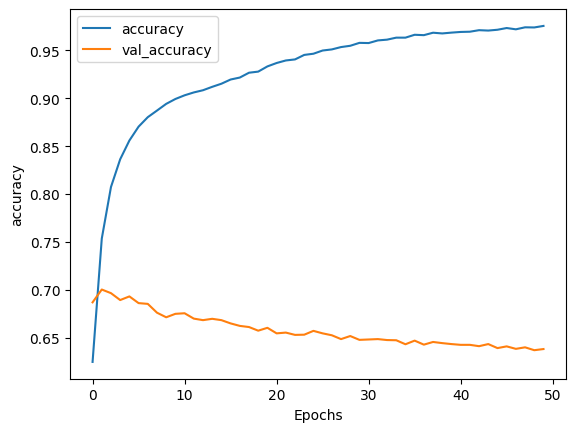

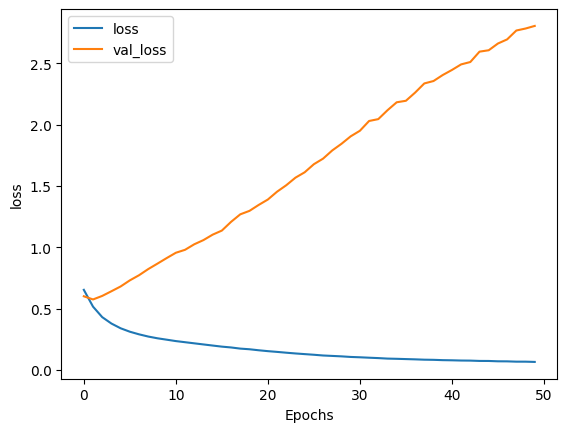

In [46]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

In [47]:
#vocab size
#seul le mot frequent est considerer comme
vocab_size = 1
vocab_size = 78371

In [48]:
wc = tokenizer.word_counts

In [49]:
wc = sorted(wc.items(), key=lambda t:t[1], reverse=True)

In [50]:
df = pd.DataFrame(wc, columns=['mots', "frequence"])

In [51]:
df[df['frequence'] > 10]

,mots,frequence
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
17156,crockett,11
17157,liliom,11
17158,nikhil,11
17159,hanka,11


In [52]:
#verifions dans le test_set combien de mot sont dans le training_test
test_tok = Tokenizer()
test_tok.fit_on_texts(test_sentences)

In [53]:
test_tok.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'he': 24,
 'are': 25,
 'his': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'by': 31,
 'at': 32,
 'an': 33,
 'they': 34,
 'who': 35,
 'from': 36,
 'so': 37,
 'like': 38,
 'her': 39,
 'just': 40,
 'or': 41,
 "'t": 42,
 'about': 43,
 'has': 44,
 'out': 45,
 'there': 46,
 "'": 47,
 'if': 48,
 'some': 49,
 'good': 50,
 'what': 51,
 'more': 52,
 'when': 53,
 'very': 54,
 'she': 55,
 'up': 56,
 'b': 57,
 'no': 58,
 'even': 59,
 'can': 60,
 'time': 61,
 'my': 62,
 'which': 63,
 'only': 64,
 'story': 65,
 'would': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'well': 72,
 'me': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'get': 77,
 'bad': 78,
 'because': 79,
 'great': 80,
 'other': 81,
 'into': 82,
 'will':

In [54]:
test_words = test_tok.word_index.keys()

In [55]:
test_words

dict_keys(['the', 'a', 'and', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'with', 'for', 'movie', 'but', 'film', "'s", 'on', 'you', 'not', 'he', 'are', 'his', 'have', 'be', 'one', 'all', 'by', 'at', 'an', 'they', 'who', 'from', 'so', 'like', 'her', 'just', 'or', "'t", 'about', 'has', 'out', 'there', "'", 'if', 'some', 'good', 'what', 'more', 'when', 'very', 'she', 'up', 'b', 'no', 'even', 'can', 'time', 'my', 'which', 'only', 'story', 'would', 'really', 'see', 'their', 'had', 'were', 'well', 'me', 'we', 'than', 'much', 'get', 'bad', 'because', 'great', 'other', 'into', 'will', 'been', 'people', 'first', 'also', 'most', 'him', 'how', 'do', 'made', 'them', 'way', 'then', 'too', 'could', 'its', "it's", 'make', 'any', 'movies', 'after', 'think', 'films', 'characters', 'watch', 'seen', 'life', 'many', 'character', 'two', 'little', 'know', 'acting', 'best', 'plot', 'where', 'show', 'being', 'off', 'did', 'over', 'never', 'does', 'love', 'ever', 'man', 'here', 'bette

In [56]:
train_words = df['mots'].tolist()

In [57]:
len(train_words), len(test_words)

(78370, 42047)

In [58]:
inter = set(train_words).intersection(test_words)

In [59]:
len(inter)

33879

In [60]:
vocab_size = 29000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
     callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 6s 8ms/step - loss: 0.6456 - accuracy: 0.6409 - val_loss: 0.5928 - val_accuracy: 0.6884
Epoch 2/50
 17/625 [..............................] - ETA: 4s - loss: 0.5320 - accuracy: 0.7500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 5s 8ms/step - loss: 0.5020 - accuracy: 0.7634 - val_loss: 0.5798 - val_accuracy: 0.7012
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4138 - accuracy: 0.8148 - val_loss: 0.6066 - val_accuracy: 0.6980
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3560 - accuracy: 0.8458 - val_loss: 0.6568 - val_accuracy: 0.6902
Epoch 5/50
625/625 [==============================] - 5s 9ms/step - loss: 0.3157 - accuracy: 0.8673 - val_loss: 0.7071 - val_accuracy: 0.6900
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2853 - accuracy: 0.8828 - val_loss: 0.7592 - val_accuracy: 0.6838
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2618 - accuracy: 0.8923 - val_loss: 0.8108 - val_accuracy: 0.6744
Epoch 8/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2423 - accuracy: 0.9003 - val_loss: 0.8574 - val_accuracy: 0.6792
Epoch 9/50
625/62

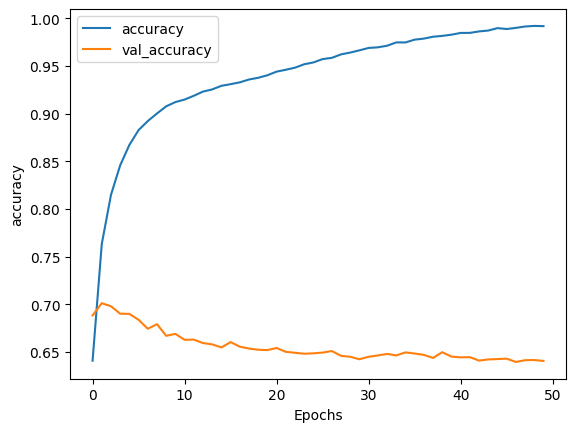

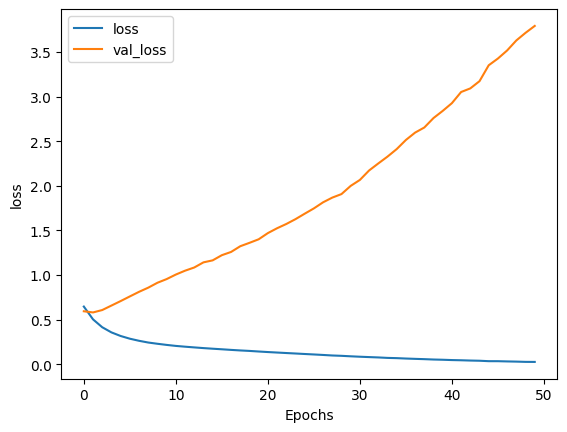

In [61]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

Embending dim

In [62]:
np.power(vocab_size, 1/4)

13.049669101523763

In [63]:
vocab_size = 29000
embedding_dim=13

tokenizer = Tokenizer(num_words=vocab_size, oov_token="")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6452 - accuracy: 0.6382 - val_loss: 0.5930 - val_accuracy: 0.6860
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.5031 - accuracy: 0.7623 - val_loss: 0.5800 - val_accuracy: 0.6988
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 0.4165 - accuracy: 0.8155 - val_loss: 0.6113 - val_accuracy: 0.6936
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.3596 - accuracy: 0.8443 - val_loss: 0.6484 - val_accuracy: 0.6904
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3183 - accuracy: 0.8669 - val_loss: 0.6967 - val_accuracy: 0.6842
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2870 - accuracy: 0.8823 - val_loss: 0.7527 - val_accuracy: 0.6876
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2638 - accuracy: 0.8932 - val_loss: 0.8097 - val_accuracy: 0.6760
Epoch 

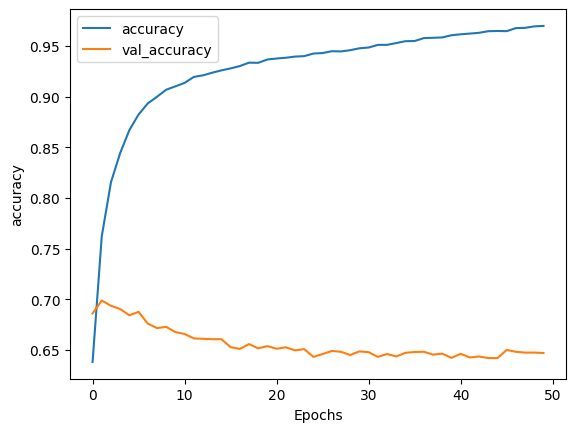

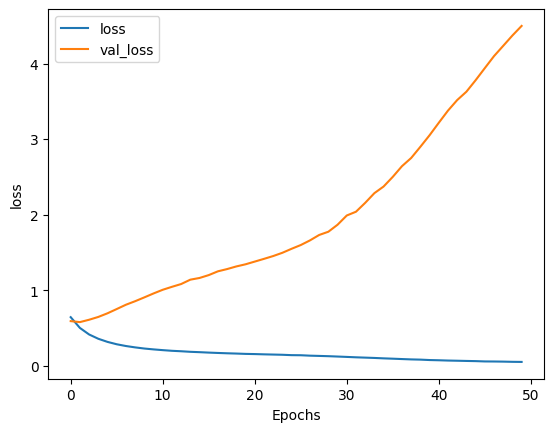

In [64]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

Architecture du model

In [65]:
vocab_size = 29000
embedding_dim=13

tokenizer = Tokenizer(num_words=vocab_size, oov_token="")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 6s 7ms/step - loss: 0.6427 - accuracy: 0.6467 - val_loss: 0.5890 - val_accuracy: 0.6834
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.4933 - accuracy: 0.7672 - val_loss: 0.5873 - val_accuracy: 0.6928
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 0.4013 - accuracy: 0.8260 - val_loss: 0.6322 - val_accuracy: 0.6904
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.3449 - accuracy: 0.8568 - val_loss: 0.6835 - val_accuracy: 0.6868
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3061 - accuracy: 0.8773 - val_loss: 0.7356 - val_accuracy: 0.6800
Epoch 6/50
625/625 [==============================] - 3s 6ms/step - loss: 0.2769 - accuracy: 0.8891 - val_loss: 0.7944 - val_accuracy: 0.6756
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2565 - accuracy: 0.8996 - val_loss: 0.8339 - val_accuracy: 0.6702
Epoch 

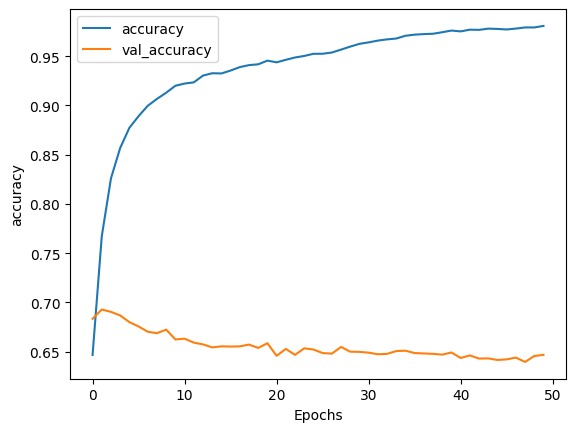

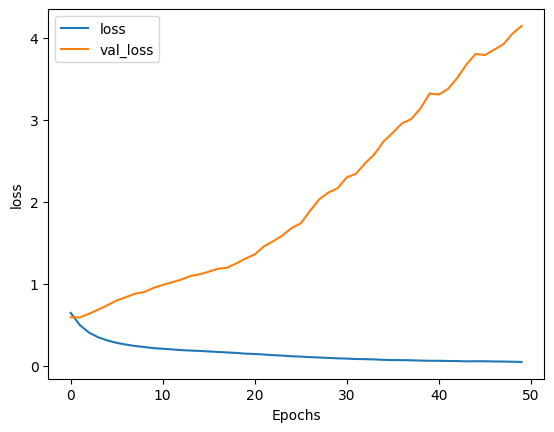

In [67]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

Max len + Dropout

In [68]:
tailles = []

for sent in training_sentences:
  tailles.append(len(sent.split(" ")))

In [69]:
np.array(tailles).min(), np.array(tailles).max(), np.array(tailles).mean()

(10, 2470, 233.90165)

In [70]:
np.median(tailles)

174.0

In [71]:
vocab_size = 29000
embedding_dim=13
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post", maxlen=maxlen, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post", maxlen=maxlen, truncating="post")

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6277 - accuracy: 0.6431 - val_loss: 0.4906 - val_accuracy: 0.8162
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 0.4228 - accuracy: 0.8178 - val_loss: 0.3828 - val_accuracy: 0.8334
Epoch 3/50
625/625 [==============================] - 5s 9ms/step - loss: 0.3123 - accuracy: 0.8813 - val_loss: 0.3812 - val_accuracy: 0.8414
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2513 - accuracy: 0.9095 - val_loss: 0.3963 - val_accuracy: 0.8372
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1949 - accuracy: 0.9334 - val_loss: 0.4395 - val_accuracy: 0.8308
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1456 - accuracy: 0.9597 - val_loss: 0.4909 - val_accuracy: 0.8280
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.1143 - accuracy: 0.9691 - val_loss: 0.5498 - val_accuracy: 0.8240
Epoch 

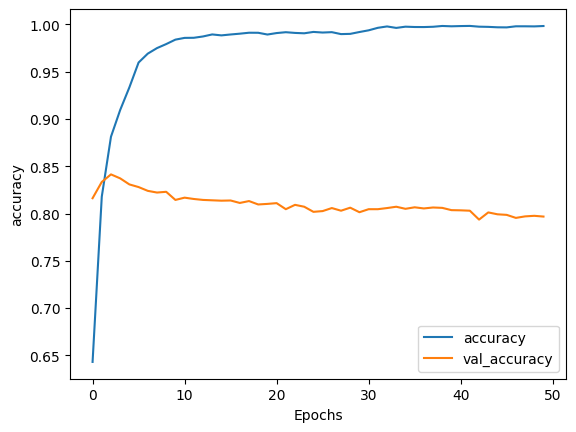

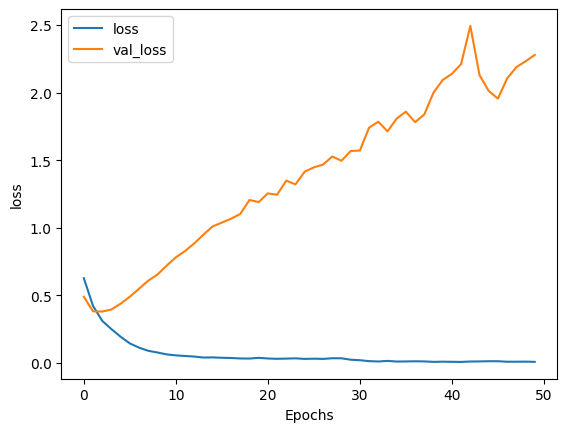

In [72]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

Transfert Learning

In [73]:
!pip install --upgrade tensorflow_hub

In [74]:
import tensorflow_hub as hub

In [75]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

In [76]:
embeddings.shape

TensorShape([2, 20])

In [77]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [78]:
training_sentences = train_examples[:20000]
training_labels = train_labels[:20000]

test_sentences = train_examples[20000:]
test_labels = train_labels[20000:]

In [79]:
train_labels[20000:]

array([0, 1, 1, ..., 0, 0, 1])

In [80]:
train_examples[0]

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [81]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", output_shape=[20],
                           input_shape=[], dtype=tf.string)

In [82]:
model = tf.keras.models.Sequential(
    [
        hub_layer,
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_sentences, training_labels, epochs=50,
              validation_data=(test_sentences, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6770 - accuracy: 0.5656 - val_loss: 0.6457 - val_accuracy: 0.6536
Epoch 2/50
 37/625 [>.............................] - ETA: 2s - loss: 0.6560 - accuracy: 0.6301

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 4s 6ms/step - loss: 0.6492 - accuracy: 0.6226 - val_loss: 0.6244 - val_accuracy: 0.6860
Epoch 3/50
625/625 [==============================] - 3s 6ms/step - loss: 0.6313 - accuracy: 0.6381 - val_loss: 0.6090 - val_accuracy: 0.6906
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6261 - accuracy: 0.6390 - val_loss: 0.5956 - val_accuracy: 0.6996
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6187 - accuracy: 0.6500 - val_loss: 0.5896 - val_accuracy: 0.6884
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6101 - accuracy: 0.6615 - val_loss: 0.5946 - val_accuracy: 0.6872
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6078 - accuracy: 0.6653 - val_loss: 0.5833 - val_accuracy: 0.7000
Epoch 8/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6048 - accuracy: 0.6691 - val_loss: 0.5841 - val_accuracy: 0.6972
Epoch 9/50
625/62

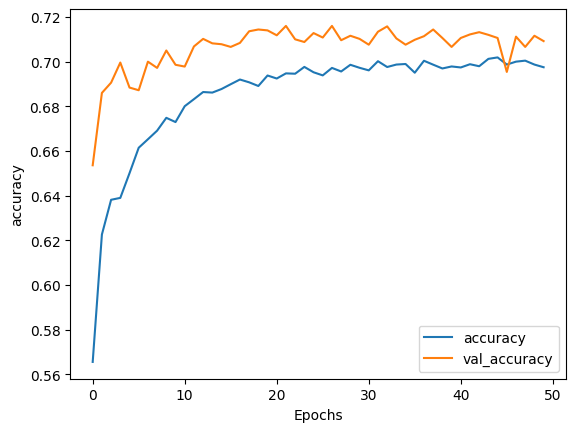

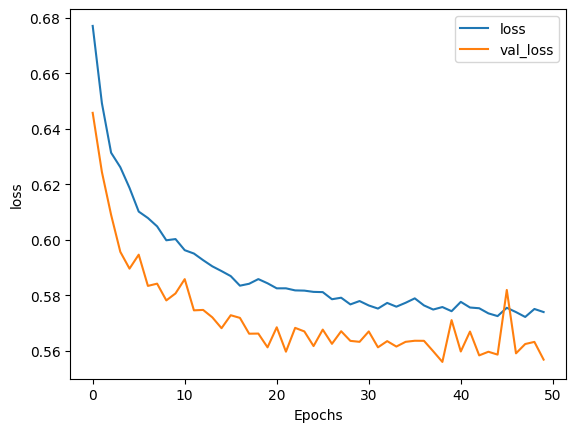

In [83]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")